<a href="https://colab.research.google.com/github/Avnish3909/Quora-Question-Pair-NLP/blob/main/Quora_Question_pair_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install kaggle


In [3]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [5]:
!kaggle competitions download -c quora-question-pairs

100% 309M/309M [00:11<00:00, 31.9MB/s]
100% 309M/309M [00:11<00:00, 27.7MB/s]


In [6]:
!unzip quora-question-pairs.zip

Archive:  quora-question-pairs.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [7]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [8]:
df1 = pd.read_csv("train.csv")
df1.shape
print(df1.sample(10))

            id    qid1    qid2  \
92667    92667  155097  155098   
298125  298125  420571  388278   
53603    53603   94740   94741   
213282  213282  318567  318568   
256025  256025  371040  181642   
386162  386162   15731   47793   
84118    84118  142264  104619   
216098  216098  190635  322158   
164777  164777   34567   35709   
19690    19690   37198   37199   

                                                question1  \
92667   Why do girls walk away while in the middle of ...   
298125                       Is nationalism brainwashing?   
53603               Why do we have different blood group?   
213282  Who invented calligraphy? How did this inventi...   
256025                 What does "irony of ironies" mean?   
386162                     How can one stop masturbation?   
84118      What are some English slang words for beliefs?   
216098  How did Priyanka jha, Dhoni's ex-girlfriend lo...   
164777  What is the best photo editing application and...   
19690   Is is n

In [9]:
df = df1.sample(frac=0.02, random_state=42)
df.shape

(8086, 6)

0    5046
1    3040
Name: is_duplicate, dtype: int64
0    62.404155
1    37.595845
Name: is_duplicate, dtype: float64


<Axes: >

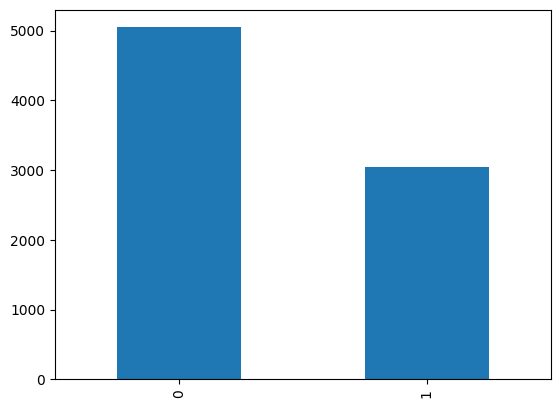

In [10]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 15742
Number of questions getting repeated 367


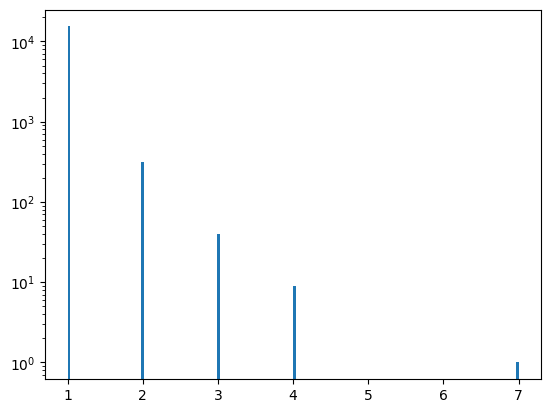

In [12]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [13]:
df['question1'].fillna("", inplace=True)
df['question2'].fillna("", inplace=True)
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7


In [14]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

df['word_common'] = df.apply(common_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,2
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,4
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,3


In [15]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6,20
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,2,24
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,4,16
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,3,16


In [16]:
df['word_share'] = round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16,0.44
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6,20,0.30
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,2,24,0.08
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,4,16,0.25
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,3,16,0.19


minimum characters in Q1 2
maximum characters in Q1 334
average num of characters in Q1 59



minimum characters in Q2 1
maximum characters in Q2 448
average num of characters in Q2 59


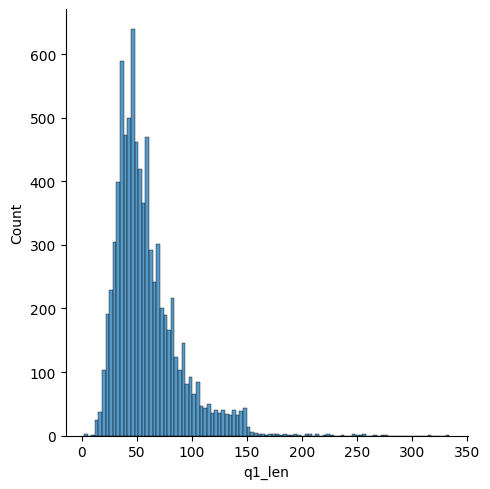

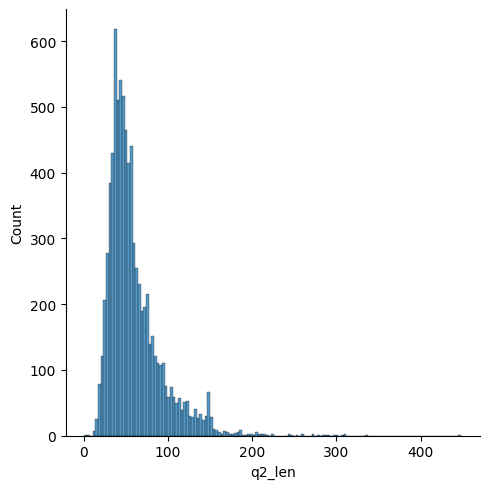

In [17]:
sns.displot(df['q1_len'])
print('minimum characters in Q1',df['q1_len'].min())
print('maximum characters in Q1',df['q1_len'].max())
print('average num of characters in Q1',int(df['q1_len'].mean()))
print('\n\n')
sns.displot(df['q2_len'])
print('minimum characters in Q2',df['q2_len'].min())
print('maximum characters in Q2',df['q2_len'].max())
print('average num of characters in Q2',int(df['q2_len'].mean()))

minimum words of Q1 1
maximum words of Q1 67
average num of words of Q1 10



minimum words of Q2 1
maximum words of Q2 92
average num of words of Q2 11


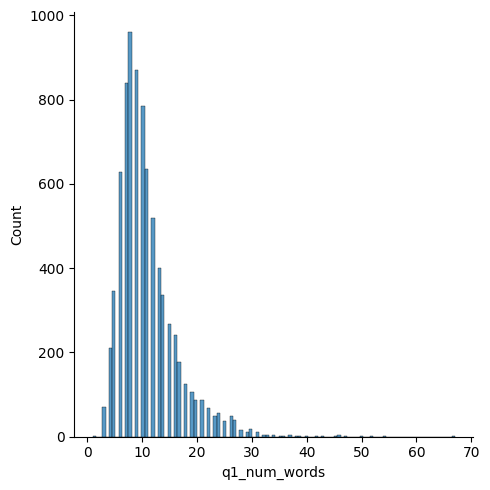

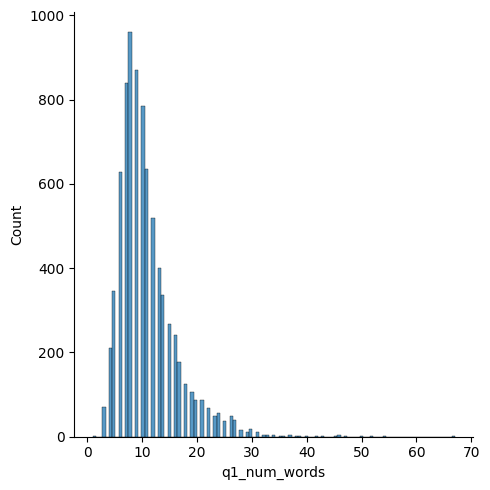

In [18]:
sns.displot(df['q1_num_words'])
print('minimum words of Q1',df['q1_num_words'].min())
print('maximum words of Q1',df['q1_num_words'].max())
print('average num of words of Q1',int(df['q1_num_words'].mean()))
print('\n\n')
sns.displot(df['q1_num_words'])
print('minimum words of Q2',df['q2_num_words'].min())
print('maximum words of Q2',df['q2_num_words'].max())
print('average num of words of Q2',int(df['q2_num_words'].mean()))

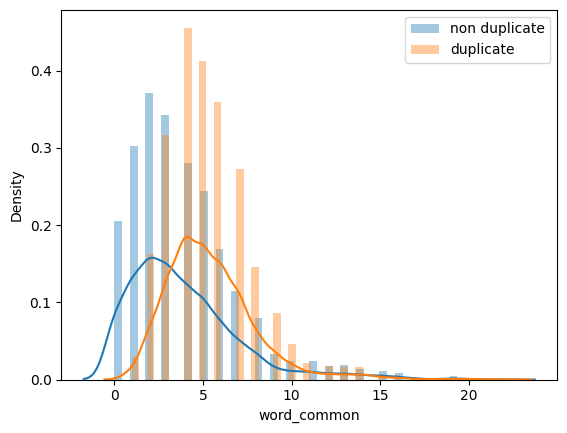

In [19]:
sns.distplot(df[df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()




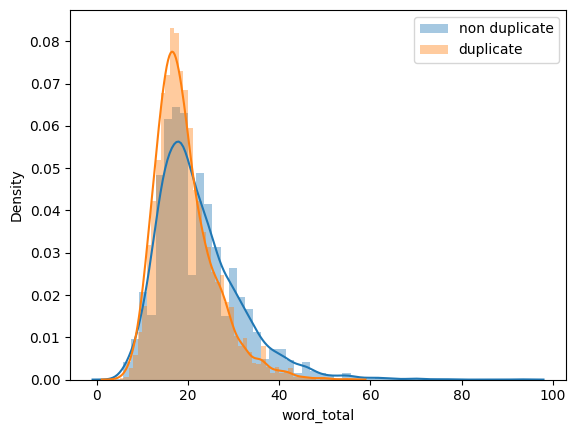

In [20]:
sns.distplot(df[df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

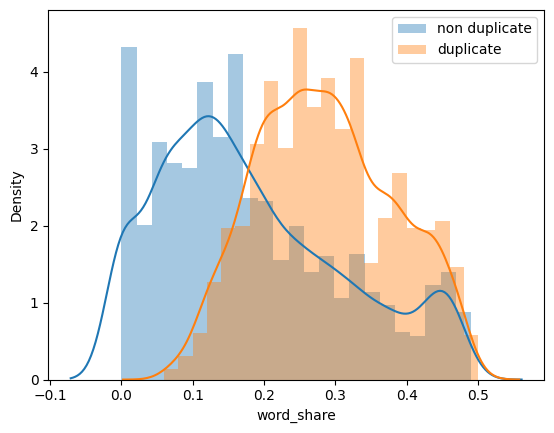

In [21]:
sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [22]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?
368101,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...
70497,Which is more advisable and better material fo...,What is the best server setup for buddypress?
226567,How do I improve logical programming skills?,How can I improve my logical skills for progra...
73186,How close we are to see 3rd world war?,How close is a World War III?


In [23]:
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(8086, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
8067,0,34,34,8,8,7,16,0.44
368101,0,53,51,11,9,6,20,0.30
70497,0,96,45,16,8,2,24,0.08
226567,1,44,52,7,9,4,16,0.25
73186,1,38,29,9,7,3,16,0.19


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)


In [25]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(8086, 6000)

In [26]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(8086, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,34,34,8,8,7,16,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
368101,0,53,51,11,9,6,20,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
70497,0,96,45,16,8,2,24,0.08,0,0,...,0,0,0,0,0,0,0,0,0,0
226567,1,44,52,7,9,4,16,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0
73186,1,38,29,9,7,3,16,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7453646477132262

In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7496909765142151

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Load your dataset and perform the train-test split as shown in the previous response

# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    XGBClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier()
]

# Create an empty dictionary to store the results
results = {}

# Iterate through the classifiers
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[clf_name] = accuracy

# Find the best classifier
best_classifier = max(results, key=results.get)
best_accuracy = results[best_classifier]

print("Classifier Performance:")
for clf, accuracy in results.items():
    print(f"{clf}: {accuracy * 100:.2f}%")

print(f"Best Classifier: {best_classifier} with Accuracy: {best_accuracy * 100:.2f}%")


Classifier Performance:
RandomForestClassifier: 73.30%
GradientBoostingClassifier: 73.18%
SVC: 64.96%
XGBClassifier: 74.97%
KNeighborsClassifier: 65.70%
LogisticRegression: 72.13%
DecisionTreeClassifier: 68.54%
Best Classifier: XGBClassifier with Accuracy: 74.97%
